In [1]:
import numpy as np

# Load the training data and labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [2]:
import numpy as np

# Load the npz file
dataset = np.load('X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)


Training data shape: (60000, 28, 28)


In [3]:
import matplotlib.pyplot as plt
import matplotlib


In [5]:
some_digit=X_train[90]

In [6]:
some_digit_img=some_digit.reshape(28,28)

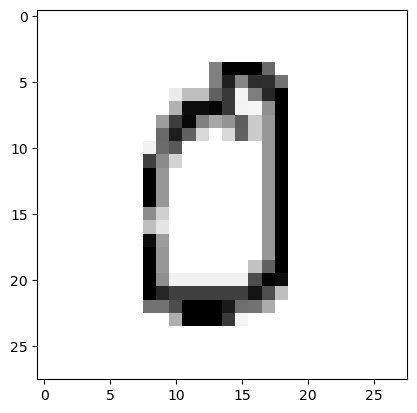

In [7]:
plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [9]:
y_train[90]

0

In [10]:
##Performing PCA to the data

In [11]:
from sklearn.decomposition import PCA

In [12]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)


In [13]:
y_train[1].dtype

dtype('uint8')

In [14]:
## WRITING A SINGLE FUNCTION TO FIND OUT VARIOUS PARAMETERS

In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [17]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8012
Decision Tree F1-score: 0.8007139010157663
Decision Tree Recall: 0.8012
Decision Tree ROC-AUC: 0.8895555555555557
Decision Tree Confusion Matrix:
[[725 147   7  47   7   1   2  10  37  17]
 [ 83 798   2  36  14  15   4   5  29  14]
 [  2   6 926  10   4  17  17   9   4   5]
 [ 16  18   7 773  31  28  30  55  19  23]
 [  1   2   2  38 853  49   5   8  20  22]
 [  6  16   4  13 106 802  13   5  21  14]
 [  4   9   9  48  18  28 756 102   3  23]
 [ 18  14   7  56  22   8 140 682  17  36]
 [ 48  18  11   7   4   8   4   7 876  17]
 [ 19  46   1  11  29  10   4  12  47 821]]


In [18]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.874
Random Forest F1-score: 0.8733540391650676
Random Forest Recall: 0.874
Random Forest ROC-AUC: 0.9891564277777778
Random Forest Confusion Matrix [[781 155   3  28   5   0   2   3  14   9]
 [ 31 910   0  22   7   3   0   2  18   7]
 [  4   2 980   1   0   7   1   3   1   1]
 [ 11   8   1 883  18  18   9  32  17   3]
 [  0   1   0  29 922  29   2   3   8   6]
 [  0   2   2  11 123 846   2   5   5   4]
 [  1   8   1  57  11  22 831  52   4  13]
 [  3  12   1  45  26   2 138 735  11  27]
 [ 18  13   2   3   3   4   1   0 952   4]
 [  6   9   0   4  16   0   5   4  56 900]]


In [19]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7725
Naive Bayes F1-score: 0.7711049536717327
Naive Bayes Recall: 0.7725
Naive Bayes ROC-AUC: 0.9722813111111112
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 26 748   9 121   8   2   0   0  65  21]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 846  31  16  21  63   0   1]
 [  1   1   1  39 872  43   1   7  28   7]
 [  0   2  15  47 165 731   6  16  13   5]
 [  5   9  50  30  25  44 729  95   3  10]
 [  9  17   4  80  50   1 177 650   2  10]
 [ 89  36  26   6   4   3   2   4 822   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8813
K-NN F1-score: 0.8802309331421995
K-NN Recall: 0.8813000000000001
K-NN ROC-AUC: 0.9737404222222222
K-NN Confusion Matrix
[[776 169   1  26   2   0   2   3  14   7]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 886  20  22   4  15  26   5]
 [  0   1   0  14 952  22   1   2   4   4]
 [  0   3   0   9 117 855   3   3   4   6]
 [  0   6   0  43  21  10 842  64   0  14]
 [  7   8   0  52  33   3 164 702   6  25]
 [ 15   9   2   2   3   6   2   0 958   3]
 [  5   8   0   0  26   0   7   4  30 920]]


In [21]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.887
SVM F1-score: 0.8864733405677822
SVM Recall: 0.8869999999999999
SVM ROC-AUC: 0.9924962555555557
SVM confusion Matrix
[[811 139   1  22   6   0   1   2  15   3]
 [ 20 923   0  27   3   3   0   4  12   8]
 [  3   2 984   0   0   5   0   4   1   1]
 [  8  11   0 886  20  22   9  26  18   0]
 [  0   1   0  14 948  22   0   0   5  10]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  50  20  22 845  39   0  13]
 [  6  13   0  33  18   4 135 747   7  37]
 [  8  14   4   0   4   4   3   0 959   4]
 [  2  13   0   0  23   0   6   3  40 913]]


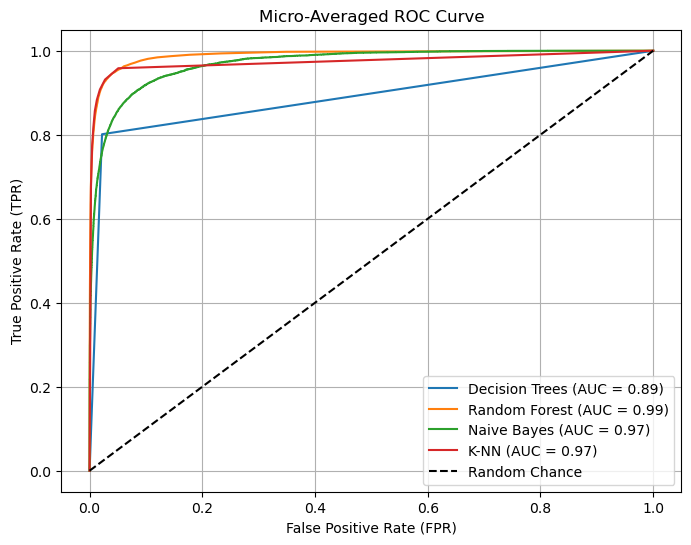

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


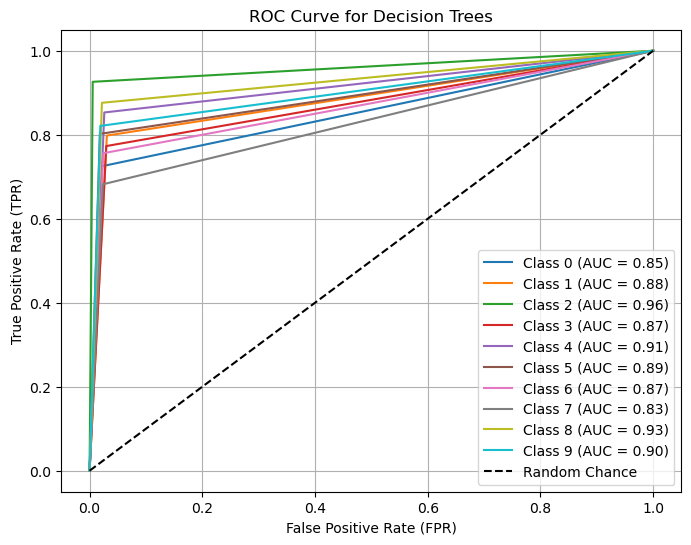

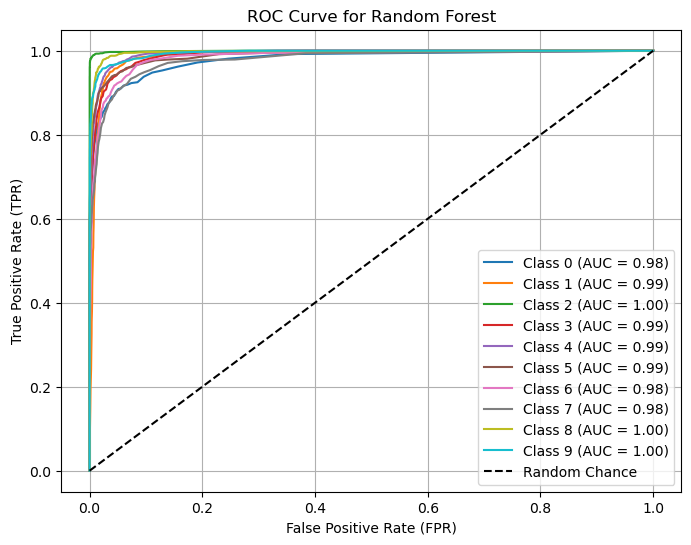

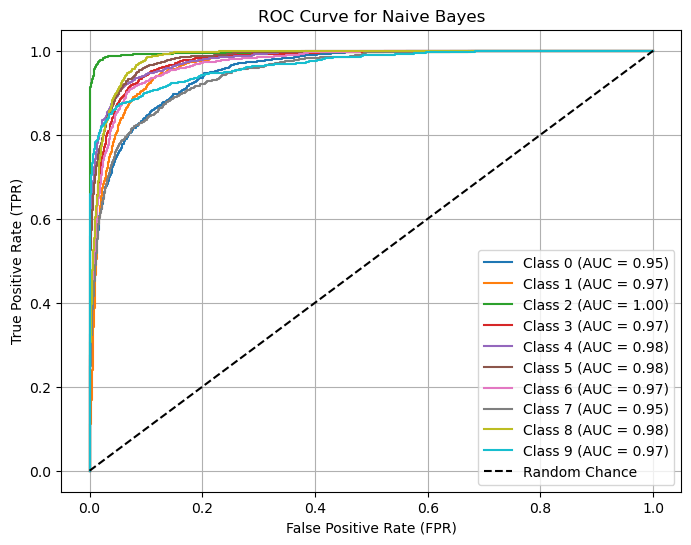

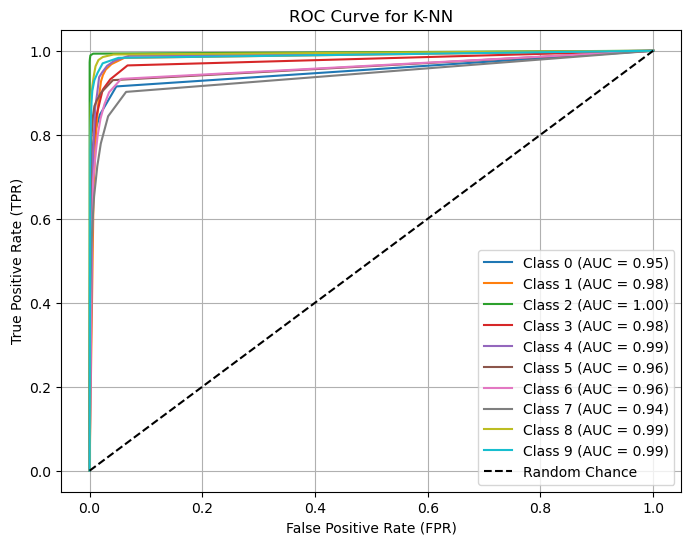

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [61]:
## WHEN the PCA component is 15

In [62]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)


In [63]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)

Decision Tree Accuracy: 0.8053
Decision Tree F1-score: 0.8043667164800425
Decision Tree Recall: 0.8053000000000001
Decision Tree ROC-AUC: 0.8918333333333335


In [64]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)

Random Forest Accuracy: 0.8894
Random Forest F1-score: 0.8887254572586712
Random Forest Recall: 0.8894
Random Forest ROC-AUC: 0.9921434388888889


In [65]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)

Naive Bayes Accuracy: 0.7837
Naive Bayes F1-score: 0.7821607900130518
Naive Bayes Recall: 0.7837000000000001
Naive Bayes ROC-AUC: 0.9748178333333332


In [66]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)

K-NN Accuracy: 0.9072
K-NN F1-score: 0.906625222559488
K-NN Recall: 0.9071999999999999
K-NN ROC-AUC: 0.9825806444444446


In [67]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)

SVM Accuracy: 0.9146
SVM F1-score: 0.9141184267094662
SVM Recall: 0.9146000000000001
SVM ROC-AUC: 0.9954136333333332


In [69]:
## performing incremental PCA and reducing the size to 15 components

In [70]:
from sklearn.decomposition import IncrementalPCA

# Reshape the training and test data to 2D
x_train_2d = X_train.reshape(x_train.shape[0], -1)
x_test_2d = X_test.reshape(x_test.shape[0], -1)

# Create and fit Incremental PCA
ipca = IncrementalPCA(n_components=10, batch_size=1000)
for batch in np.array_split(x_train_2d, len(x_train_2d) // 1000):
    ipca.partial_fit(batch)

# Transform the data using IPCA
x_train_ipca = ipca.transform(x_train_2d)
x_test_ipca = ipca.transform(x_test_2d)

# Print the shape of the transformed data
print("Training data shape after IPCA:", x_train_ipca.shape)
print("Test data shape after IPCA:", x_test_ipca.shape)


Training data shape after IPCA: (60000, 10)
Test data shape after IPCA: (10000, 10)


In [71]:
'x_train_ipca','x_test_ipca'

('x_train_ipca', 'x_test_ipca')

In [72]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc = evaluate_model(dt_classifier,x_train_ipca, y_train, x_test_ipca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)

Decision Tree Accuracy: 0.8025
Decision Tree F1-score: 0.8017683752796472
Decision Tree Recall: 0.8025
Decision Tree ROC-AUC: 0.8902777777777778


In [79]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc = evaluate_model(rf_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)

Random Forest Accuracy: 0.8756
Random Forest F1-score: 0.8752512001845233
Random Forest Recall: 0.8756
Random Forest ROC-AUC: 0.9898640833333335


In [78]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc = evaluate_model(nb_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)

Naive Bayes Accuracy: 0.7627
Naive Bayes F1-score: 0.7614761019280496
Naive Bayes Recall: 0.7626999999999999
Naive Bayes ROC-AUC: 0.9714617333333333


In [77]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc = evaluate_model(knn_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)

K-NN Accuracy: 0.8835
K-NN F1-score: 0.8826611711889891
K-NN Recall: 0.8835000000000001
K-NN ROC-AUC: 0.9738341444444444


In [76]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc = evaluate_model(svm_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)

SVM Accuracy: 0.8933
SVM F1-score: 0.8926762445795117
SVM Recall: 0.8933
SVM ROC-AUC: 0.9930305222222222
